## 1). Project objective:
- Predict the price of a used device (phone/tablet) using Linear Regression.

## 2). Data Dictionary:

- brand_name: Name of manufacturing brand. Categorical variable which is to be used.
- os: OS on which the device runs. Useful as ios will be costlier than Microsoft.
- screen_size: Size of the screen in cm. Useful, larger screens warrant more prices.
- 4g: Whether 4G is available or not. Useful, more features => more costly. 
- 5g: Whether 5G is available or not. Same as 4G above.
- main_camera_mp: Resolution of the rear camera in megapixels. Useful, higher the better.
- selfie_camera_mp: Resolution of the front camera in megapixels. Same as above. 
- int_memory: Amount of internal memory (ROM) in GB. Useful, more memory => more price.
- ram: Amount of RAM in GB Similar as above. 
- battery: Energy capacity of the device battery in mAh. Useful, larger batteries => costlier phones. 
- weight: Weight of the device in grams. Bigger phones weigh more and cost more. 
- release_year: Year when the device model was released. Useful, can be modified to create another variable called 'Age_of_the_model', which is 2021 - release_year. This is expected to be inversely correlated to price. 
- days_used: Number of days the used/refurbished device has been used. Useful, more => lesser price. 
- new_price: Price of a new device of the same model in euros. Useful, reasonable estimate. 
- used_price: Price of the used/refurbished device in euros. This is the target variable **y**.

## 3). Recap of the 14-step approach:

1. Import packages - All the import lines should be in the same cell/code-block.
2. Verify data granularity and the target variable.
3. Check for missing values and data types: data.info, data.isnull().sum() etc.
4. Change data types if necessary, and do string manipulations on text columns if needed.
5. Impute missing values for categorical and numerical variables: extra categories, median based on groups.
6. Verify that there aren't any more missing values.
7. Perform EDA: Histograms, bar plots, heatmaps etc. for insights. Target variable vs other variables (correlation, bar plots) is the main piece of EDA for modelling.
8. Check for skewness in the numerical variables and do a log transformation if data is skewed (Use histogram to visually check for skewness). Skewness should decrease later. Also check for outliers at this stage and remove/clip a few if possible. 
9. Create dummy variables for the categorical variables (object, category data types).
10. Fit a linear regression model with a constant (Use either Great Learning code or Medium.com article code: https://medium.com/analytics-vidhya/linear-regression-in-python-with-scikit-learn-e1bb8a059cd2). Check for multicollinearity and iterate the model with different variables at this stage.
11. Evaluate with the testing metrics (Use Great Learning code functions for this one - function called 'model_performance_regression').
12. Model performance metrics should be similar from training to test. If test accuracies are much lower than train accuracies, that implies overfitting. Use RMSE as the main metric. It should be less than 10-15% of the median target variable's value.
13. Also check for residuals being normally distributed. This and multi-collinearity are the only assumptions that matter.
14. Sit back and enjoy. Your watch has ended.

## 4). Let's code!

### 4.1). Import packages

In [2]:
# This will help in making the Python code more structured automatically
%load_ext nb_black

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Splitting the data into train and test
from sklearn.model_selection import train_test_split

# Building a  linear regression_model
from sklearn.linear_model import LinearRegression

# To check the model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## 4.2). Verify data granularity and target variable

data.head() or data.sample() can give us an idea of the granularity, and histogram of data['target_variable'] can give us an idea of the distribution of the target variable.

In [21]:
# loading data
data = pd.read_csv("used_device_data.csv")

data.shape


(3454, 15)

<IPython.core.display.Javascript object>

In [22]:
data.sample()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
45,Huawei,Android,16.81,yes,yes,13.0,16.0,128.0,6.0,4200.0,196.0,2019,477,650.19,217.12


<IPython.core.display.Javascript object>

Each row is thus one individual phone and its price. That is the granularity. Now for checking the distribution of phone prices. 

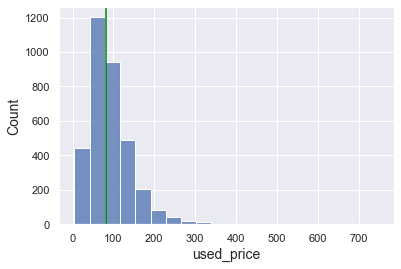

<IPython.core.display.Javascript object>

In [24]:
sns.histplot(data, x="used_price", bins=20)
plt.xlabel("used_price", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=data["used_price"].median(), color="green")

### 4.3). EDA-1: Missing values and data types

In [30]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
# Calculating %age of data which has missing values
round(data.isnull().sum() * 100 / len(data), 1)

brand_name          0.0
os                  0.0
screen_size         0.0
4g                  0.0
5g                  0.0
main_camera_mp      5.2
selfie_camera_mp    0.1
int_memory          0.1
ram                 0.1
battery             0.2
weight              0.2
release_year        0.0
days_used           0.0
new_price           0.0
used_price          0.0
dtype: float64

<IPython.core.display.Javascript object>

We see that 5% of the data is missing majorly, and that being a numerical variable, we can easily replace it with a median or a group median. Since 5% is a low number, low-effort is okay and we can replace it with a median directly. Imputation should be preferred to dropping because our original dataset has less number of rows to start with.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

We see only 4 categorical variables: os, 4g, 5g, and brand_name. os and brand_name can be split into dummy variables and 4g, 5g have yes/no which can be converted into 1s and 0s(dummies), as computers prefer 1s and 0s to yes/no.

In [37]:
# Checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

Since we do the EDA for numerical variables separately in histograms and heatmaps, let's check the categorical variables counts using value.counts().

In [202]:
#Checking the types of OS available in phones
data["os"].value_counts()
# Most phones are android in this data. Seems like refurbished ios data isn't that available.

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

<IPython.core.display.Javascript object>

In [203]:
 # Checking whether phones have 4G
data["4g"].value_counts() 

yes    2335
no     1119
Name: 4g, dtype: int64

<IPython.core.display.Javascript object>

In [204]:
data["5g"].value_counts()  

no     3302
yes     152
Name: 5g, dtype: int64

<IPython.core.display.Javascript object>

In [205]:
#Counting the number of phones in each brand
data["brand_name"].value_counts()
# These are a lot of brands actually, resulting in many dummy variables.
# Unless there is a better way to group them, we will prefer to keep them all.

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Motorola      106
Nokia         106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
OnePlus        22
Microsoft      22
BlackBerry     22
Coolpad        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

## 4.4.). Change data types and work on text columns if necessary

Not needed as all the data types are as expected.

## 4.5). Impute categorical and numerical variables accordingly

All categorical variables are 100% populated. FOr the numerical variables, since a maximum of 5% is missing, we can use the median filler technique for imputation. If there were a lot of missing values, we would have imputed using median + some grouping (which gives a good insight), but for now the percentage of missing values is too less to exert ourselves so much.

In [254]:
df = data.copy()  # Ensuring protection of the original dataframe

# Imputing only the missing value containing numerical variables, with medians
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].transform(lambda x: x.fillna(x.median()))

# Transform is the same as writing this: df[col] = df[col].apply(lambda x: x.fillna(x.median())).
# It is especially useful if we first need to group by before applying the transformation, which we didn't do, incidentally.

# If you want to do it though!
# for col in cols_impute:
#     df[col] = df.groupby(["brand_name"])[col].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

### 4.6.). Check again for missing values and ensure 0 for each column

In [255]:
df.isnull().sum()  # Perfect!

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

In [256]:
df.head(3)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85


<IPython.core.display.Javascript object>

### 4.7). EDA-2: Histograms, barplots and heatmaps!

Main thing to focus here is the plots between the target variable and other variables, and also the individual histograms of numerical variables to check for skewness. If skewness exists, we can do a log-transform.

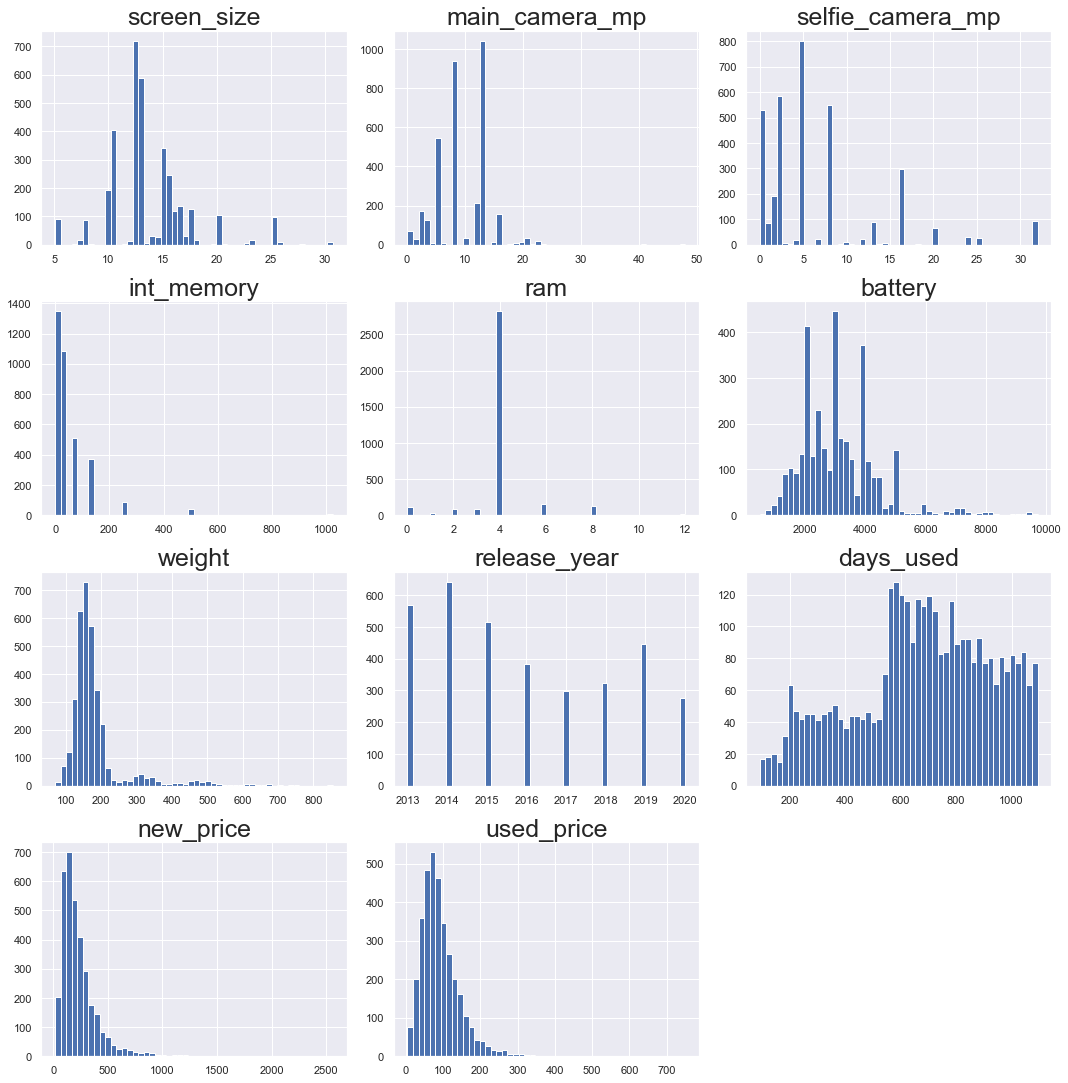

<IPython.core.display.Javascript object>

In [209]:
### Individual histograms of all numerical variables at once

## Select all numerical columns
numerical_cols = [
    col for col in df.columns if col not in ["os", "4g", "5g", "brand_name"]
]

## Now plot them
plt.figure(figsize=(15, 45))

for i in range(len(numerical_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[numerical_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(numerical_cols[i], fontsize=25)

plt.show()

There is a tiny bit of skewness in int_memory, weight, new_price and used_price. Let's log-transform them.

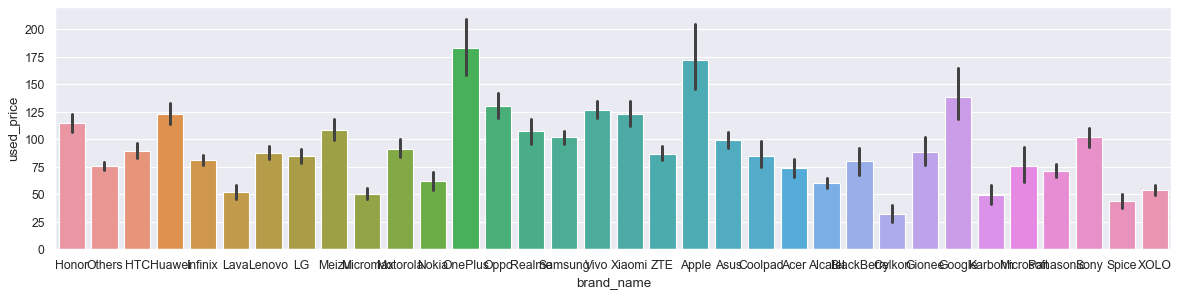

<IPython.core.display.Javascript object>

In [210]:
### Barplots

from matplotlib.pyplot import figure

figure(figsize=(18, 4), dpi=80)
sns.barplot(x="brand_name", y="used_price", data=df)

# Show the plot
plt.show()  # Plot isn't that clear but Apple, OnePlus and Google are the costliest phones.

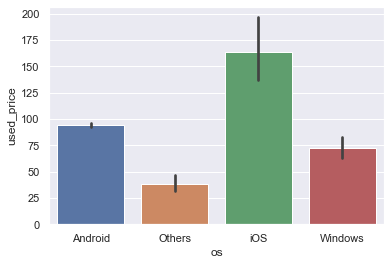

<IPython.core.display.Javascript object>

In [211]:
sns.barplot(x="os", y="used_price", data=df)
plt.show()  # IOS is out and out the costliest operating system out there.

### 4.8). Do log and other transformations

In [257]:
df["new_price_log"] = np.log(df["new_price"])
df["new_int_memory"] = np.log(df["int_memory"])
df["new_weight"] = np.log(df["weight"])
df["new_used_price"] = np.log(
    df["used_price"]
)  # Remember to evaluate on actual values after building the model,
# not on these log-values

# Drop the old columns
df.drop(columns=["new_price"], inplace=True)
df.drop(columns=["int_memory"], inplace=True)
df.drop(columns=["weight"], inplace=True)
df.drop(columns=["used_price"], inplace=True)
df.sample(5)

# All these transformations are useful only if the residuals are not normally distributed,
# which is the main assumption of linear regression.

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,new_price_log,new_int_memory,new_weight,new_used_price
1207,HTC,Android,12.70,no,no,8.0,5.0,4.0,2100.0,2014,1044,5.247287,3.465736,5.075174,4.258446
1423,Karbonn,Android,12.70,no,no,8.0,0.3,4.0,1800.0,2013,840,4.789157,2.772589,4.649187,3.583797
3418,Samsung,Android,15.34,yes,no,8.0,8.0,2.0,4000.0,2020,352,4.880527,3.465736,5.176150,4.186468
1422,Karbonn,Android,10.16,no,no,5.0,0.3,4.0,1625.0,2013,708,4.113657,2.772589,4.740575,3.231989
1147,Others,Android,19.94,no,no,2.0,0.3,4.0,3800.0,2014,664,4.792230,2.772589,5.746203,4.297285


<IPython.core.display.Javascript object>

We next add age as a column and drop release_year. Computer understands age as a variable better than a time variable called release_year. We are manipulation information without losing the value, in essence.

In [258]:
df["age_of_model"] = 2021 - df["release_year"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age_of_model', ylabel='Count'>

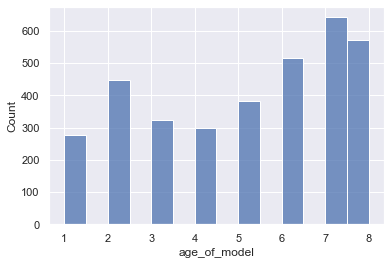

<IPython.core.display.Javascript object>

In [214]:
sns.histplot(df["age_of_model"])

In [259]:
df.drop(columns=["release_year"], inplace=True)

<IPython.core.display.Javascript object>

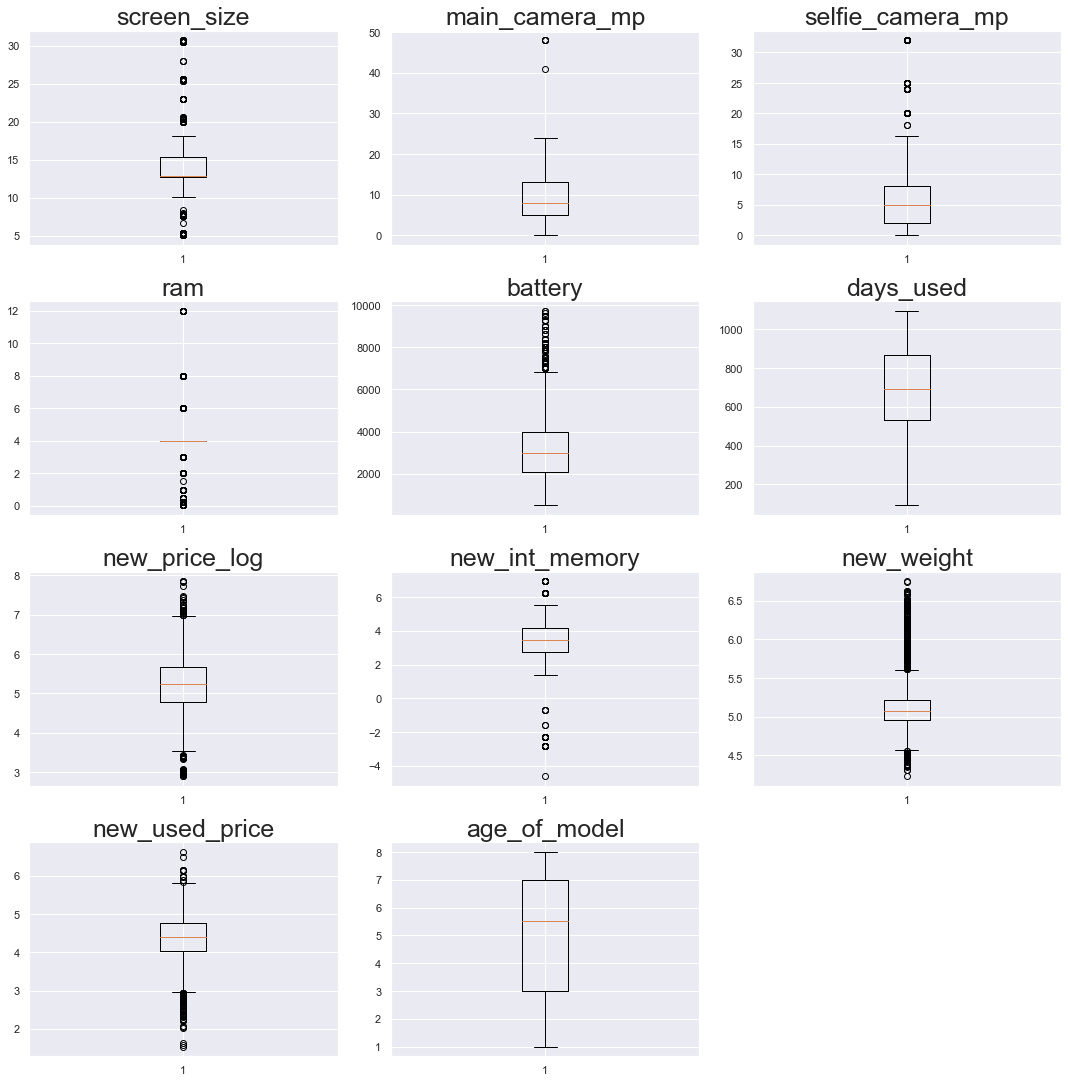

<IPython.core.display.Javascript object>

In [260]:
################ Outliers ##############

### Individual boxplots to identify presence of outliers

## Select all numerical columns
numerical_cols = [
    col for col in df.columns if col not in ["os", "4g", "5g", "brand_name"]
]

## Now plot them
plt.figure(figsize=(15, 45))

for i in range(len(numerical_cols)):
    plt.subplot(12, 3, i + 1)
    plt.boxplot(df[numerical_cols[i]])
    plt.tight_layout()
    plt.title(numerical_cols[i], fontsize=25)

plt.show()

Now, when it comes to outliers, we should only remove them if they are improbably high. Just because a 2000$ phone is an outlier in a box-plot, we don't need to remove it because the phone could be gold plated. So let's check for the maximum values for each numerical variable and then take a call if the values seem outlandish.

In [217]:
### Print max values for each numerical variable

## Select all numerical columns
numerical_cols = [
    col for col in df.columns if col not in ["os", "4g", "5g", "brand_name"]
]

for col in numerical_cols:
    print(f"Range of column '{col}' = ({df[col].min()}, {df[col].max()})")

Range of column 'screen_size' = (5.08, 30.71)
Range of column 'main_camera_mp' = (0.08, 48.0)
Range of column 'selfie_camera_mp' = (0.0, 32.0)
Range of column 'ram' = (0.02, 12.0)
Range of column 'battery' = (500.0, 9720.0)
Range of column 'days_used' = (91, 1094)
Range of column 'new_price_log' = (2.9014215940827497, 7.847840659422009)
Range of column 'new_int_memory' = (-4.605170185988091, 6.931471805599453)
Range of column 'new_weight' = (4.23410650459726, 6.75110146893676)
Range of column 'new_used_price' = (1.536867219599265, 6.619433001642933)
Range of column 'age_of_model' = (1, 8)


<IPython.core.display.Javascript object>

We can clearly see that screen size is a little extra, 30cm is close to 1 feet, no phone is one feet. Let's cap those values to 7 inches.

In [261]:
# Clipping
df.loc[df["screen_size"] > 18, "screen_size"] = 18

for col in numerical_cols:
    print(f"Range of column '{col}' = ({df[col].min()}, {df[col].max()})")

Range of column 'screen_size' = (5.08, 18.0)
Range of column 'main_camera_mp' = (0.08, 48.0)
Range of column 'selfie_camera_mp' = (0.0, 32.0)
Range of column 'ram' = (0.02, 12.0)
Range of column 'battery' = (500.0, 9720.0)
Range of column 'days_used' = (91, 1094)
Range of column 'new_price_log' = (2.9014215940827497, 7.847840659422009)
Range of column 'new_int_memory' = (-4.605170185988091, 6.931471805599453)
Range of column 'new_weight' = (4.23410650459726, 6.75110146893676)
Range of column 'new_used_price' = (1.536867219599265, 6.619433001642933)
Range of column 'age_of_model' = (1, 8)


<IPython.core.display.Javascript object>

Done! 

Minimum price of used_price is also fishy at 4.65, but we don't know if it is a flash sale. 

In [219]:
### 4.9). Create dummy variables for the categorical variables

X = df.drop(["new_used_price"], axis=1)
y = df["new_used_price"]

print(X.head())
print("--" * 50)
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        18.00  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  ram  battery  days_used  new_price_log  new_int_memory  \
0               5.0  3.0   3020.0        127       4.715100        4.158883   
1              16.0  8.0   4300.0        325       5.519018        4.852030   
2               8.0  8.0   4200.0        162       5.884631        4.852030   
3               8.0  6.0   7250.0        345       5.630961        4.158883   
4               8.0  3.0   5000.0        293       4.947837        4.158883   

   new_weight  age_of_model  
0    4.983607             1  
1    5.361292             1  
2    5.361292             1  
3    6.173786       

<IPython.core.display.Javascript object>

In [220]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,days_used,new_price_log,new_int_memory,new_weight,age_of_model,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,3.0,3020.0,127,4.715100,4.158883,4.983607,1,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,8.0,4300.0,325,5.519018,4.852030,5.361292,1,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,8.0,4200.0,162,5.884631,4.852030,5.361292,1,...,0,0,0,0,0,0,0,0,1,1
3,18.00,13.0,8.0,6.0,7250.0,345,5.630961,4.158883,6.173786,1,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,3.0,5000.0,293,4.947837,4.158883,5.220356,1,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [221]:
# Splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

### 4.10). Linear Regression using statsmodel package

In [235]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

## I got a 0.75 adj-R-squared as compared to 0.85 for Great Learning where they used before doing log(price).

                            OLS Regression Results                            
Dep. Variable:         new_used_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:42:50   Log-Likelihood:                 148.06
No. Observations:                2417   AIC:                            -198.1
Df Residuals:                    2368   BIC:                             85.61
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

<IPython.core.display.Javascript object>

### 4.11). Evaulation of the model

In [262]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

<IPython.core.display.Javascript object>

### 4.12). Training vs Test accuracy check

In [263]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
print(olsmodel1_train_perf)
print("##" * 30)

# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
print(olsmodel1_test_perf)

Training Performance

        RMSE        MAE       MAPE
0  24.947967  16.161193  18.438679
############################################################
Test Performance

        RMSE        MAE       MAPE
0  23.955355  16.392528  19.115231


<IPython.core.display.Javascript object>

In [268]:
### 10-15% RMSE Thumb Rule (Error percentage)
23.955 * 100 / data[
    "used_price"
].median()  # 29% is much greater than 10-15% which is a good model.

29.25980212532063

<IPython.core.display.Javascript object>

**This is a poor performance despite a high adjusted R-squared. I wouldn't trust linear regression with this data, and will resort to other models if possible.**

This also goes to show why RMSE is a better metric than adjusted R-squared.

### 4.13). Model Assumptions (Residual normality, multicollinearity)

In [269]:
### Check for residual normality

# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Predicted Values"] = olsmodel1.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel1.resid  # residuals

df_pred.head()

,Actual Values,Predicted Values,Residuals
3026,4.087488,3.833747,0.253741
1525,4.448399,4.681581,-0.233182
1128,4.315353,4.322930,-0.007578
3003,4.282068,4.273002,0.009066
2907,4.456438,4.444743,0.011695


<IPython.core.display.Javascript object>

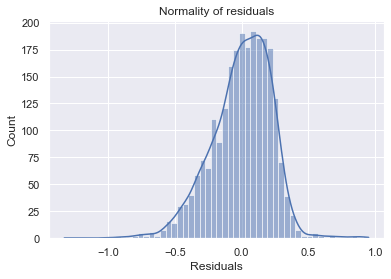

<IPython.core.display.Javascript object>

In [270]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()  # CLose to normal. Passable

In [228]:
#### Check for multi-collinearity

# Note that VIF should be ignored for dummy variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [229]:
checking_vif(x_train1)

,feature,VIF
0,const,747.999311
1,screen_size,5.114107
2,main_camera_mp,2.104177
3,selfie_camera_mp,2.891346
4,ram,2.244585
5,battery,3.764109
6,days_used,2.671742
7,new_price_log,3.064457
8,new_int_memory,2.085191
9,new_weight,4.868713


<IPython.core.display.Javascript object>

Release year/Age of model is the only one showing high VIF (Infinity for some reason).

In [230]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [233]:
col_list = ["screen_size"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841451,0.232463


<IPython.core.display.Javascript object>

RMSE dropping after removal, so it is okay to remove the scree size variable.

In [245]:
col_to_drop = "screen_size"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,656.690970
1,main_camera_mp,2.096142
2,selfie_camera_mp,2.862726
3,ram,2.244027
4,battery,3.730165
5,days_used,2.656364
6,new_price_log,3.044263
7,new_int_memory,2.085006
8,new_weight,3.067594
9,age_of_model,4.754600


<IPython.core.display.Javascript object>

All are less than 5 now! Let's model again!!

In [246]:
# adding constant to the train data
x_train2 = sm.add_constant(x_train2)
# adding constant to the test data
x_test2 = sm.add_constant(x_test2)

olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         new_used_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     273.8
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:46:24   Log-Likelihood:                 121.13
No. Observations:                2417   AIC:                            -146.3
Df Residuals:                    2369   BIC:                             131.7
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.56

<IPython.core.display.Javascript object>

In [271]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
print(olsmodel1_train_perf)
print("##" * 30)

# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
print(olsmodel2_test_perf)

Training Performance

        RMSE        MAE       MAPE
0  24.947967  16.161193  18.438679
############################################################
Test Performance

        RMSE        MAE       MAPE
0  24.222395  16.550516  19.473597


<IPython.core.display.Javascript object>

**Not much of an improvement, really (No improvement at all). It is better to use another model which is not so sensitive to outliers and normality, and which can give a better RMSE when using the 10-15% thumb rule.**

### 4.14). Your watch has ended, but only to realize that a new model is needed ;)